importation des librairies

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

lecture du dataset

In [99]:
file_path = '../data/lacentrale-dev.csv'
lacentral_df = pd.read_csv(file_path)
lacentral_df.head()

,price,model,energy,gear_box,kilometers,year,zip_code,cylinder,horsepower
0,158 590 €,PORSCHE 911 TYPE 997 CABRIOLET phase 2,Essence,Automatique,68 076 km,2013,61 ‌,3.8,530.0
1,16 030 €,MINI MINI III 5P,Essence,Manuelle,119 081 km,2016,76 ‌,1.5,102.0
2,127 490 €,PORSCHE 911 TYPE 993,Essence,Manuelle,184 800 km,1999,45 ‌,3.6,285.0
3,26 400 €,RENAULT KADJAR,Diesel,Manuelle,42 607 km,2021,77 ‌,1.5,115.0
4,10 640 €,RENAULT CLIO IV,Essence,Manuelle,143 050 km,2016,92 ‌,1.2,75.0


In [100]:
lacentral_df.columns

Index(['price', 'model', 'energy', 'gear_box', 'kilometers', 'year',
       'zip_code', 'cylinder', 'horsepower'],
      dtype='object')

In [101]:
lacentral_df.describe()

,year,cylinder,horsepower
count,8016.000000,7999.000000,7999.000000
mean,2018.966816,6.679385,158.920090
std,4.693410,34.735221,111.921142
min,1958.000000,0.500000,0.500000
25%,2018.000000,1.200000,102.000000
50%,2020.000000,1.500000,130.000000
75%,2022.000000,2.000000,180.000000
max,2024.000000,1200.000000,3243.000000


Visualister les 20 modeles de voitures les plus vendus

In [102]:
car_model = lacentral_df.model.value_counts().reset_index().head(20)
car_model

,model,count
0,PEUGEOT 208 II,140
1,CITROEN C3 III phase 2,109
2,PEUGEOT 3008 II,107
3,PEUGEOT 2008 II,104
4,CITROEN C3 III,99
5,RENAULT CLIO V,93
6,MERCEDES CLASSE A IV,85
7,PEUGEOT 2008 phase 2,78
8,PEUGEOT 3008 II phase 2,75
9,PEUGEOT 308 II phase 2,74


Text(0, 0.5, 'Model name')

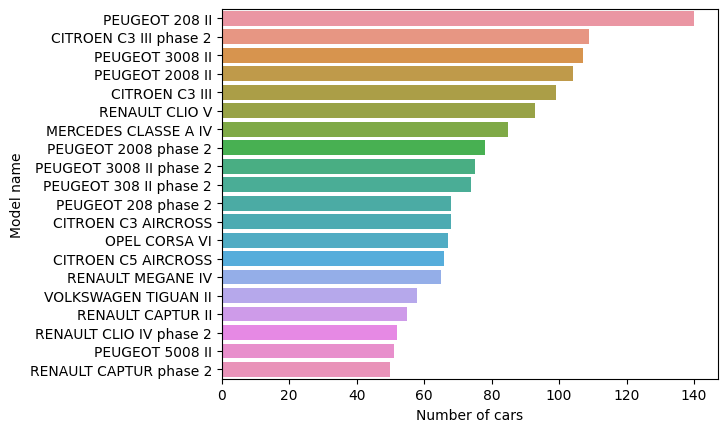

In [103]:
sns.barplot(y='model', x='count', data=car_model)
plt.xlabel('Number of cars')
plt.ylabel('Model name')

On a beaucoup de model mais les nombres devoiture par modeles sont peu élevé
on va donc regarder les 20 marques les plus vendus

In [104]:
marques = car_model.model.str.strip().str.split().str[0].value_counts().reset_index().head(20)
marques

,model,count
0,PEUGEOT,8
1,RENAULT,5
2,CITROEN,4
3,MERCEDES,1
4,OPEL,1
5,VOLKSWAGEN,1


Text(0, 0.5, 'Model name')

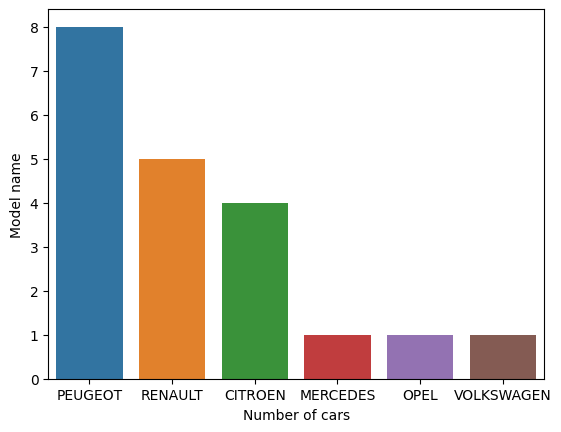

In [105]:
sns.barplot(y='count', x='model', data=marques)
plt.xlabel('Number of cars')
plt.ylabel('Model name')

La c'est plus parlant et on peut dire que les français aiment bien les peugeots.

Maintenant regardant du coté des prix.

In [ ]:
# lacentral_df.price = lacentral_df.price.str.strip().str.extract(r'([0-9 ]+)')[0].str.replace(' ', '').astype('int')
# lacentral_df.price = lacentral_df[lacentral_df.price < 200000]['price']

         price                                   model      energy   
0     158590.0  PORSCHE 911 TYPE 997 CABRIOLET phase 2     Essence  \
1      16030.0                        MINI MINI III 5P     Essence   
2     127490.0                    PORSCHE 911 TYPE 993     Essence   
3      26400.0                          RENAULT KADJAR      Diesel   
4      10640.0                         RENAULT CLIO IV     Essence   
...        ...                                     ...         ...   
8011   32810.0                         PEUGEOT 5008 II      Diesel   
8012   36150.0                    VOLKSWAGEN GOLF VIII     Essence   
8013   34030.0                          DS 3 CROSSBACK  Électrique   
8014   18790.0                       PEUGEOT 308 II SW     Essence   
8015   44730.0                           JAGUAR F-PACE      Diesel   

         gear_box  kilometers  year zip_code  cylinder  horsepower  
0     Automatique   68 076 km  2013     61 ‌       3.8       530.0  
1        Manuelle  11

Text(0, 0.5, 'Frequency')

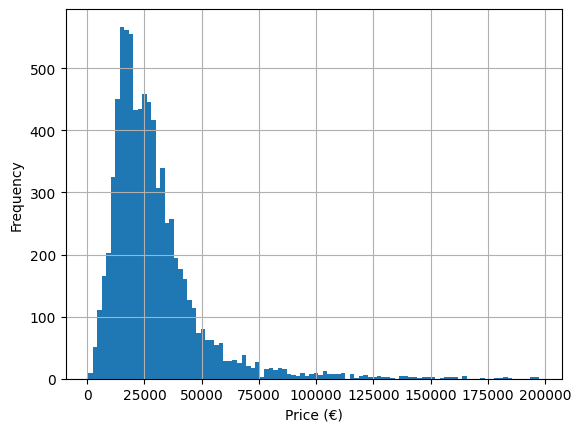

In [111]:
print(lacentral_df)
car_price = lacentral_df.price
car_price.hist(bins=100)
plt.xlabel('Price (€)')
plt.ylabel('Frequency')

Regardons la puissance

<Axes: xlabel='horsepower', ylabel='Count'>

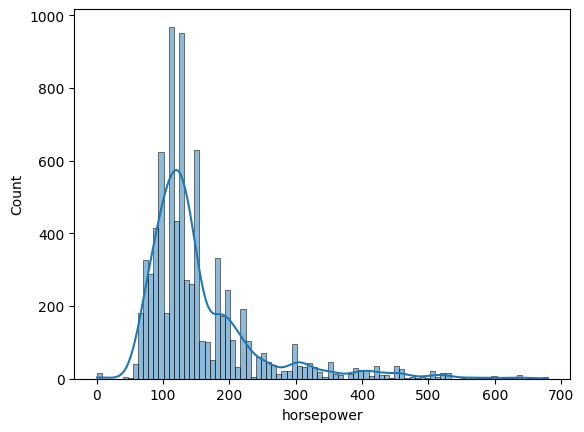

In [115]:
lacentral_df.horsepower = lacentral_df[lacentral_df.horsepower < 700]['horsepower']
sns.histplot(data=lacentral_df, x="horsepower", kde=True)

On peut maintenant regarder par rapport à la date de la mise en circulation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021'),
  Text(17, 0, '2022'),
  Text(18, 0, '2023'),
  Text(19, 0, '2024')])

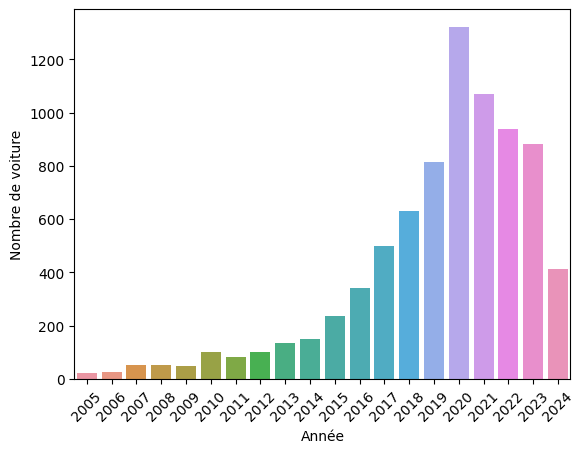

In [119]:
sns.barplot(x='year', y='count', data=lacentral_df['year'].value_counts().reset_index().head(20))
plt.xlabel('Année')
plt.ylabel('Nombre de voiture')
plt.xticks(rotation=45)

<AxesSubplot: xlabel='kilometrage', ylabel='Count'>

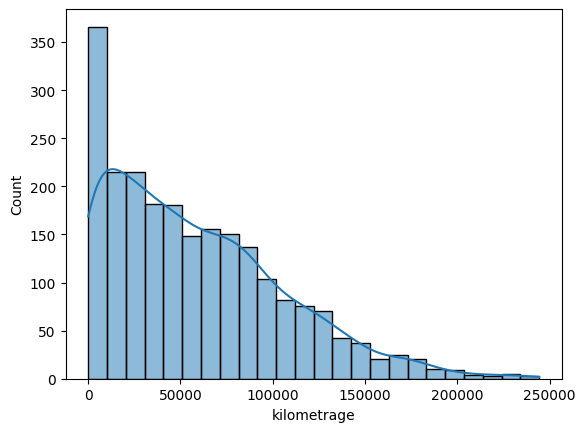

In [12]:
sns.histplot(data=car, x="kilometrage", kde=True)

On peut regarder aussi le type du carburant

In [13]:
energies = car['energie'].value_counts().reset_index()
energies

,index,energie
0,Diesel,1150
1,Essence,1073
2,Electrique,37


Text(0, 0.5, 'Carburant')

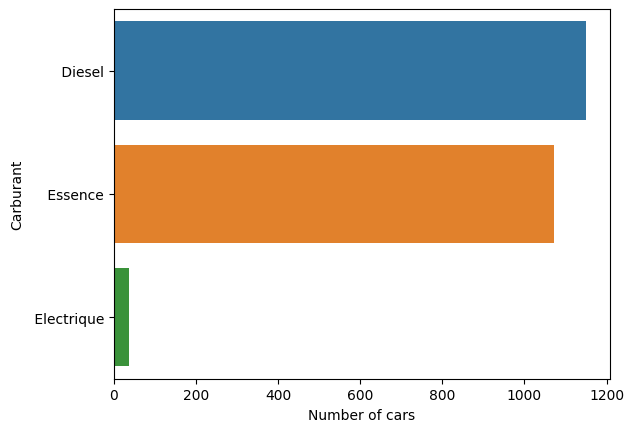

In [14]:
sns.barplot(x='energie', y='index', data=energies)
plt.xlabel('Number of cars')
plt.ylabel('Carburant')

/tmp/ipykernel_47414/1968698472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car.corr()


<AxesSubplot: >

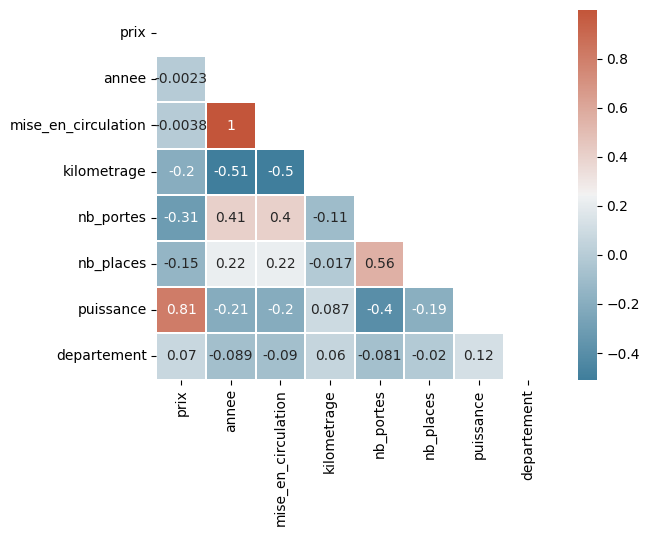

In [15]:
corr = car.corr()
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, linewidths=0.01, mask=mask, cmap=cmap)

On s'aperçoit que la puissance et l'année de mise en circulation sont des facteurs importants dans la vente de la voiture